In [21]:
!pip install sentence-transformers
!pip install xgboost
!pip install lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=fe55c684b5dadd2dc1957e739cf69f20a846ee14e29f5df20285aa2fc2bce0fe
  Stored in directory: c:\users\alphonsa\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sentence_transformers import SentenceTransformer
from sentence_transformers.losses import CosineSimilarityLoss

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

In [50]:
#Reading the file from desktop.
train = pd.read_csv("C:\\Users\\ALPHONSA\\OneDrive\\Desktop\\Twitter Sentiment Analysis\\twitter_training.csv", header = None)
#Renaming the colunmns.
train.rename(columns = {0:'tweet_id', 1:'entity' , 2:'sentiment' , 3:'tweet'}, inplace=True)
#Drop the null values & fill up the blank rows.
train = train.dropna().reset_index(drop = True)
train_id = train['tweet_id']
train['sentiment_label'] = train['sentiment'].astype('category').cat.codes
# To display all the rows of the DataFrame -> pd.set_option('display.max_rows', None)

val = pd.read_csv("C:\\Users\\ALPHONSA\\OneDrive\\Desktop\\Twitter Sentiment Analysis\\twitter_validation.csv", header = None)
val.rename(columns = {0:'tweet_id', 1:'entity', 2:'sentiment', 3:'tweet'}, inplace = True)
val = val.dropna().reset_index(drop = True)
val_id = val['tweet_id']
val['sentiment_label'] = val['sentiment'].astype('category').cat.codes
#reset_index() lets you set the indices to default.
df = pd.concat([train, val]).reset_index(drop = True)
#EDA on unique tweets.
sd = df.groupby("tweet_id").head(1).reset_index(drop = True)
sd

,tweet_id,entity,sentiment,tweet,sentiment_label
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,3
1,2402,Borderlands,Positive,So I spent a few hours making something for fu...,3
2,2403,Borderlands,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",2
3,2404,Borderlands,Positive,that was the first borderlands session in a lo...,3
4,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...,1
...,...,...,...,...,...
12442,9196,Nvidia,Negative,Cheap doesn't mean better btw! . . techsall.co...,1
12443,9197,Nvidia,Neutral,Nvidia doesn’t want to give up its 2017 ‘crypt...,2
12444,9198,Nvidia,Negative,Nvidia really delayed the 3070 2 weeks .,1
12445,9199,Nvidia,Positive,Let no elim go unnoticed. . . . NVIDIA Highlig...,3


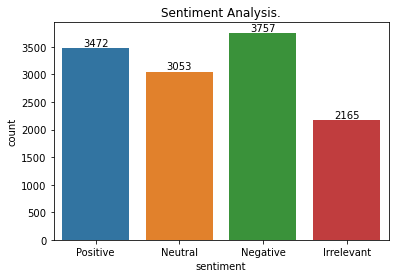

In [55]:
plt.figure()
ax = sns.countplot(x = 'sentiment', data = sd)
plt.title("Sentiment Analysis.")

for container in ax.containers:
    ax.bar_label(container)
plt.show()